# 1. 관심데이터 설정
- 저는 원래 학부 전공이 의료계열이기 때문에 이번 Section4에서 딥러닝을 배우면서도  
의료분야에 딥러닝을 접목시키는것에 관심이 많이 갔습니다.  
그러던중 MRI나 CT와 같은 의료영상, 이미지 쪽에서도 딥러닝이 활발히 연구가 되고  
쓰이고 있다는 사실을 알게되었습니다.

- 그래서 저는 의료영상과 관련된 데이터를 찾던 중 캐글에서 뇌CT 이미지 데이터를  
찾게되었고 해당 데이터로 이번 프로젝트를 진행하기로 결정하였습니다.  
이미지는 뇌출혈이 있는 CT이미지와 뇌출혈이 없는 CT이미지로 구분된 데이터 입니다.

#2. 데이터 선정 이유 &nbsp;
- 이번에 선정한 CT이미지 데이터들을 분석, 가공하고 딥러닝을 통한 학습까지 진행해 보면서  
해당 분야에 대한 도메인 지식을 쌓고 그를 통해 차차 다른 종류의 의료영상 데이터들 까지  
 적용, 확장을 좀 더 수월하게 할 수 있을것 이라 기대합니다.

- 또한 의료기기 회사나 병원에서 딥러닝을 이용한 영상판독을 해주어 의사가 해당 판독을  
참고하거나, 더 나아가 사람이 놓치거나 구분하기 힘든 부분까지 판독하는, 인간보다 높은  
수준의 정확도와 판독을 보여주는 모습도 충분히 기대해 볼 수 있다고 생각합니다.

# 3. 데이터를 이용한 가설 수립
- 아래의 두 이미지셋은 각각 뇌출혈이 있는 이미지(hm_image)와 뇌출혈이 없는 이미지(not_hm_image) 입니다.  
각각의 3장씩의 이미지들을 보고 뇌출혈 유무를 구분할 수 있나요?
- x-ray, CT, MRI와 같은 영상들은 사실 찍는것 자체보다는 판독을 하는데 의의가 있다고 볼 수 있습니다.  
작은 종양을 가진 사람이 MRI촬영을 아무리 잘 했어도 해당 영상을 판독하는 과정에서 발견하지 못한다면  
안찍은것과 다를바가 없을테니까요.
- 저는 이번 프로젝트에서 뇌CT 이미지를 딥러닝을 통하여 학습하여 모델이 이미지를 읽고 뇌출혈 유무를 판단할 수 있다는  
가설을 세우고 진행하겠습니다.

In [ ]:
# 데이터의 용량이 매우 큰 관계로 로컬 jupyter notebook환경에서 진행하였습니다.

cd OneDrive/바탕 화면/AI_project  # 로컬환경 내 학습에 진행할 data가 있는곳으로 이동

C:\Users\jij16\OneDrive\바탕 화면\AI_project


In [ ]:
import os

hm = os.listdir('train/hm_image/')
not_hm = os.listdir('train/not_hm_image/')

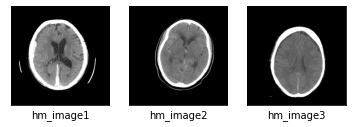

In [ ]:
import cv2
import glob
 
fig = plt.figure() # rows*cols 행렬의 i번째 subplot 생성
rows = 1
cols = 3
i = 1
 
xlabels = range(4)
# 3장의 뇌출혈이 있는 sample 사진을 보여준다
for pi in range(3):
    img = cv2.imread('train/hm_image/' + hm[pi+1])
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_xlabel('hm_image'+str(xlabels[i]))
    ax.set_xticks([]), ax.set_yticks([])
    i += 1
 
plt.show()

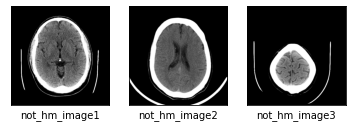

In [ ]:
fig = plt.figure()
rows = 1
cols = 3
i = 1
 
xlabels = range(4)
# 3장의 뇌출혈이 없는 sample 사진을 보여준다 
for pi in range(3):
    img = cv2.imread('train/not_hm_image/' + not_hm[pi+1])
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_xlabel('not_hm_image'+str(xlabels[i]))
    ax.set_xticks([]), ax.set_yticks([])
    i += 1
 
plt.show()

# 4. 데이터 전처리
- 모델 학습과 테스트에 사용할 이미지 데이터는 총 11만장 정도로 그 용량은 약 7.5기가 정도입니다.  
이렇게 대용량의 데이터를 일일이 변수에 할당하고 전처리를 해주면 램용량을 초과하여 학습을 진행할  
수 없는 일이 발생하기 때문에 ImageDataGenerator를 이용하여 각 데이터들이 모델 학습에 들어가기 바로  
직전에 전처리를 거치고 들어가게 일종의 파이프라인 개념으로 설계하였습니다.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Train ImageDataGenerator
train_gen = ImageDataGenerator(horizontal_flip=True, rescale=1/255.) # input데이터 값을 0~1사이로 정규화(rescale).
# val ImageDataGenerator                                             # 또한 train데이터 에서는 인풋을 무작위로 가로로 뒤집어주는 horizontal_flip 옵션을 True로 주어 진행해 보았습니다.
val_gen = ImageDataGenerator(rescale=1/255.)
# Test ImageDataGenerator
test_gen = ImageDataGenerator(rescale=1/255.)

train_flow_gen = train_gen.flow_from_directory(directory='train', # train 데이터가 있는 경로 설정
                                              target_size=(224, 224),  # 사용할 CNN 모델 입력 사이즈에 맞게 resize
                                              class_mode='binary',  # 뇌출혈 유,무를 판단하므로 binary
                                              batch_size=8,  # 로컬환경에서 GPU를 통하여 학습중 GPU 램용량을 초과하는 일이 발생하여 64->32->16->8 까지 줄임
                                              shuffle=True)  # train data는 data를 랜덤하게 섞어서 진행
val_flow_gen = val_gen.flow_from_directory(directory='val',
                                            target_size=(224, 224),
                                            class_mode='binary',
                                            batch_size=8,
                                            shuffle=False)
test_flow_gen = test_gen.flow_from_directory(directory='test',
                                            target_size=(224, 224),
                                            class_mode='binary',
                                            batch_size=8,
                                            shuffle=False)

Found 69727 images belonging to 2 classes.
Found 25711 images belonging to 2 classes.
Found 11753 images belonging to 2 classes.


# 5. 딥러닝 방식 적용
- 전체 프로젝트는 local환경의 jupyter notebook에서 진행하였습니다.

In [ ]:
# 처음에 cpu를 통해 학습을 시작했다가, 시간이 너무 오래걸려 tensorflow-gpu를 설치 후 gpu를 이용하여 학습을 진행하였습니다.

from tensorflow.python.client import device_lib
device_lib.list_local_devices()  # local GPU를 사용할 준비가 된걸 확인할 수 있습니다.

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17507423940746965106,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2196032718
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2655294221715883916
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1060 3GB, pci bus id: 0000:08:00.0, compute capability: 6.1"]

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# 모델 생성 함수
def create_model():
    input_tensor = Input(shape=(224, 224, 3))
    pretrained_model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet') # imagenet 가중치가 적용된 Xception모델사용.
    pretrained_output = pretrained_model.output                                                   # include_top 옵션을 False로하여 기존모델의 output layer를 사용하지 않고 진행할 학습의 유형에 맞게 customize해주도록 한다.
    
    # customize Classifier layer
    x = GlobalAveragePooling2D()(pretrained_output)
    x = Dense(units=128, activation='relu')(x)
    # 이진 분류이므로 활성함수를 sigmoid로 변경
    output = Dense(units=1, activation='sigmoid')(x)
    model = Model(inputs=input_tensor, outputs=output)
    return model

# 모델 생성
model = create_model()

# 모델 compile
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습 weight 저장
checkpoint_filepath = 'checkpoint/'  # 학습된 weight를 저장할 경로 지정
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# 모델 학습
train_hist = model.fit(train_flow_gen, epochs=10, validation_data=val_flow_gen, callbacks=[model_checkpoint_callback])

Epoch 1/10
8716/8716 [==============================] - 2704s 310ms/step - loss: 0.2958 - accuracy: 0.8738 - val_loss: 0.1725 - val_accuracy: 0.9294
Epoch 2/10
8716/8716 [==============================] - 2656s 305ms/step - loss: 0.1510 - accuracy: 0.9423 - val_loss: 0.1302 - val_accuracy: 0.9458
Epoch 3/10
8716/8716 [==============================] - 2657s 305ms/step - loss: 0.1177 - accuracy: 0.9545 - val_loss: 0.1236 - val_accuracy: 0.9498    
Epoch 4/10
8716/8716 [==============================] - 2657s 305ms/step - loss: 0.0966 - accuracy: 0.9631 - val_loss: 0.1247 - val_accuracy: 0.9492
Epoch 5/10
8716/8716 [==============================] - 2657s 305ms/step - loss: 0.0792 - accuracy: 0.9702 - val_loss: 0.1335 - val_accuracy: 0.9522
Epoch 6/10
8716/8716 [==============================] - 2737s 314ms/step - loss: 0.0679 - accuracy: 0.9748 - val_loss: 0.1184 - val_accuracy: 0.9537
Epoch 7/10
8716/8716 [==============================] - 2789s 320ms/step - loss: 0.0559 - accuracy: 0.

# 6. Chance Level 이 넘는지 확인

In [1]:
# 전체 Epcoh 중에서 best weight를 불러온다

model.load_weights('checkpoint/')  # ModelCheckpoint 함수에서 monitor='val_accuracy',mode='max' 를 사용했기 때문에 Epoch 9의 weight가 로드된다

In [ ]:
# 학습 완료 모델의 test data 정확도 평가

test_hist = model.evaluate(test_flow_gen) # 결과 정확도 약 0.95

1470/1470 [==============================] - 103s 70ms/step - loss: 0.1469 - accuracy: 0.9484


In [ ]:
# 학습을 진행하기 전 모델의 test data 정확도 평가

before_model = create_model()
before_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
before = before_model.evaluate(test_flow_gen) # 결과 정확도 약 0.58

1470/1470 [==============================] - 6686s 5s/step - loss: 0.6723 - accuracy: 0.5817


In [ ]:
# test data label 비율
hm = os.listdir('test/hm_image/') # test셋의 뇌출혈이 있는 이미지(이름) 리스트 생성
not_hm = os.listdir('test/not_hm_image/') # test셋의 뇌출혈이 없는 이미지(이름) 리스트 생성
print('테스트셋에서 뇌출혈이 없는 이미지 비율 :', len(not_hm)/(len(hm) + len(not_hm)))  # test셋의 뇌출혈이 없는 data의 비율이 약 0.54

테스트셋에서 뇌출혈이 없는 이미지 비율 : 0.5384157236450268


- 테스트 셋에서 모든 데이터를 뇌출혈이 없다고 판단했을때의 정확도와(0.54) 학습 전 모델의 정확도(0.58)가 별 차이가 없음을 알 수 있다.
- 그에 반해 학습을 완료 한 모델의 test data 정확도는 약 0.95로 학습이 매우 잘 이루어진걸로 판단된다.



&nbsp;  
&nbsp;

# 7. 모델 검증(Validation)
- 학습한 모델의 train, val, test 각각의 정확도로 보아 일반화가 이루어 졌다고 판단된다.

# 8. 기타
- 학습 진행에 따른 정확도, 로스값 시각화

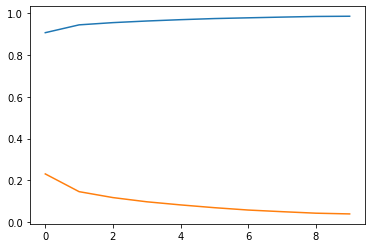

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_hist.history['accuracy'])
plt.plot(train_hist.history['loss'])
plt.show()

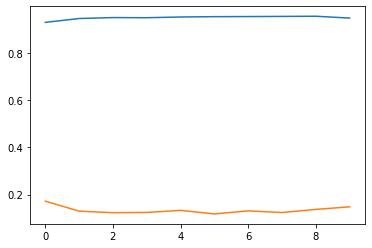

In [ ]:
plt.plot(train_hist.history['val_accuracy'])
plt.plot(train_hist.history['val_loss'])
plt.show()

# 9. 한계점과 해결방안 & 아쉬운점
- 의사가 뇌CT 사진을 통해 뇌출혈 유무를 판독하는것은 비교적 쉬운 일이라고 합니다. 따라서 해당 모델이  
실제 상황에서의 실용성은 다소 낮겠지만 추후에는 뇌출혈 유무에만 국한되는 것이 아닌 MRI와 같은 복잡한  
영상에서 image segmentation 등을 활용하여 여러 종류의 크고 작은 종양 등 인간이 놓치거나 까다로울 수  
있는 부분까지 판독해 줄 수 있을거라 생각합니다.

- 데이터의 양이 많아 학습하는데 시간이 오래 걸리다보니 모델 학습에 대해 더 다양한 시도를 해보지는  
못한것이 아쉬움으로 남습니다.